<a href="https://colab.research.google.com/github/hedayet13/learning-tensorflow/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__


'2.5.0'

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-17 05:45:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   119MB/s    in 0.9s    

2021-07-17 05:45:12 (119 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [3]:
!ls pizza_steak

test  train


In [4]:
!cd pizza_steak/train/

In [5]:
!ls

__MACOSX  pizza_steak  pizza_steak.zip	sample_data


In [6]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [7]:
import os 

In [8]:
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"Threre are {len(dirnames)} directoris and {len(filenames)} images in '{dirpath}'")

Threre are 2 directoris and 1 images in 'pizza_steak'
Threre are 2 directoris and 1 images in 'pizza_steak/test'
Threre are 0 directoris and 250 images in 'pizza_steak/test/pizza'
Threre are 0 directoris and 250 images in 'pizza_steak/test/steak'
Threre are 2 directoris and 1 images in 'pizza_steak/train'
Threre are 0 directoris and 750 images in 'pizza_steak/train/pizza'
Threre are 0 directoris and 750 images in 'pizza_steak/train/steak'


In [9]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [10]:
import pathlib 
import numpy as np 
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name  for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [12]:
def view_random_image(target_dir ,target_class):
   target_folder = target_dir + target_class
  #  print(target_folder)
   random_image = random.sample(os.listdir(target_folder),1)
   print(random_image)
   img = mpimg.imread(target_folder+"/"+random_image[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");

   print(f"image Shape:{img.shape}")
   return img

['1663749.jpg']
image Shape:(512, 512, 3)


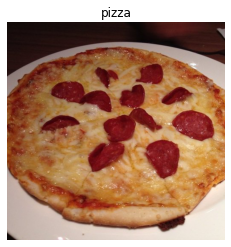

In [13]:
img = view_random_image(target_dir="pizza_steak/train/",
                  target_class ="pizza")

In [14]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 17,   9,   7],
        [ 17,   9,   7],
        [ 17,   9,   7],
        ...,
        [ 25,  11,  10],
        [ 26,  12,  11],
        [ 28,  14,  13]],

       [[ 18,  10,   8],
        [ 18,  10,   8],
        [ 18,  10,   8],
        ...,
        [ 31,  15,  15],
        [ 32,  16,  16],
        [ 33,  19,  18]],

       [[ 18,  10,   8],
        [ 18,  10,   8],
        [ 18,  10,   8],
        ...,
        [ 35,  20,  17],
        [ 36,  21,  18],
        [ 37,  22,  19]],

       ...,

       [[ 17,   8,   9],
        [ 17,   8,   9],
        [ 17,   8,   9],
        ...,
        [244, 238, 224],
        [244, 238, 224],
        [245, 239, 225]],

       [[ 17,   7,   6],
        [ 17,   7,   6],
        [ 16,   8,   6],
        ...,
        [243, 237, 223],
        [244, 238, 224],
        [244, 238, 224]],

       [[ 15,   5,   4],
        [ 16,   6,   5],
        [ 15,   7,   5],
        ...,
        [241, 235, 22

In [15]:
img.shape

(512, 512, 3)

In [16]:
width ,height ,channel = img.shape

In [17]:
channel

3

In [18]:
img.min()

0

In [19]:
img.max()

255

In [20]:
img/255.0

array([[[0.06666667, 0.03529412, 0.02745098],
        [0.06666667, 0.03529412, 0.02745098],
        [0.06666667, 0.03529412, 0.02745098],
        ...,
        [0.09803922, 0.04313725, 0.03921569],
        [0.10196078, 0.04705882, 0.04313725],
        [0.10980392, 0.05490196, 0.05098039]],

       [[0.07058824, 0.03921569, 0.03137255],
        [0.07058824, 0.03921569, 0.03137255],
        [0.07058824, 0.03921569, 0.03137255],
        ...,
        [0.12156863, 0.05882353, 0.05882353],
        [0.1254902 , 0.0627451 , 0.0627451 ],
        [0.12941176, 0.0745098 , 0.07058824]],

       [[0.07058824, 0.03921569, 0.03137255],
        [0.07058824, 0.03921569, 0.03137255],
        [0.07058824, 0.03921569, 0.03137255],
        ...,
        [0.1372549 , 0.07843137, 0.06666667],
        [0.14117647, 0.08235294, 0.07058824],
        [0.14509804, 0.08627451, 0.0745098 ]],

       ...,

       [[0.06666667, 0.03137255, 0.03529412],
        [0.06666667, 0.03137255, 0.03529412],
        [0.06666667, 0

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen =ImageDataGenerator(rescale=1./255.)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

cnn_model = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters=10,
                            kernel_size = 3,
                            activation ='relu',
                            input_shape =(224,224,3)),
     tf.keras.layers.Conv2D(10,3,activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=2,
                               padding="valid"),
     tf.keras.layers.Conv2D(10,3,activation='relu'),
     tf.keras.layers.Conv2D(10,3,activation='relu'),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)


cnn_model.compile(
    loss= tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#len(train data ) = total images/batch size
history_1= cnn_model.fit(train_data,
                         epochs =5,
                         steps_per_epoch =len(train_data),
                         validation_data =valid_data,
                         validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 199ms/step - loss: 0.5785 - accuracy: 0.6713 - val_loss: 0.3684 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4135 - accuracy: 0.8107 - val_loss: 0.3356 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3872 - accuracy: 0.8413 - val_loss: 0.3070 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3485 - accuracy: 0.8567 - val_loss: 0.3087 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3029 - accuracy: 0.8707 - val_loss: 0.3129 - val_accuracy: 0.8680


In [23]:
#Epoch 1/5
# 47/47 [==============================] - 111s 2s/step - loss: 0.6017 - accuracy: 0.6547 - val_loss: 0.4420 - val_accuracy: 0.7940

In [24]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [25]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(4,activation ='relu'),
     tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer =tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 1.7594 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [26]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [27]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (224,224,3)),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation = "relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

model_3.compile(
    loss= "binary_crossentropy",
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["accuracy"]
)

history_3 = model_3.fit(train_data,
                        epochs =5 ,
                        steps_per_epoch  = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 2.9208 - accuracy: 0.6333 - val_loss: 1.6968 - val_accuracy: 0.5980
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 1.2681 - accuracy: 0.6493 - val_loss: 0.6417 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6474 - accuracy: 0.7360 - val_loss: 0.7713 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5326 - accuracy: 0.7607 - val_loss: 1.4765 - val_accuracy: 0.5500
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5541 - accuracy: 0.7587 - val_loss: 0.4636 - val_accuracy: 0.7940


In [28]:
 model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [29]:
15000000/31000

483.8709677419355

['523535.jpg']
image Shape:(512, 512, 3)
['3629996.jpg']
image Shape:(512, 512, 3)


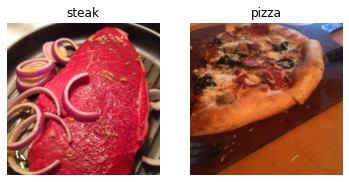

In [30]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [31]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [32]:
!nvidia-smi

Sat Jul 17 05:48:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)




In [34]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32,)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [35]:
images, labels = train_data.next()
len(images),len(labels)

(32, 32)

In [36]:
type(train_data)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [37]:
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [38]:
tf.random.set_seed(42)

model_4 = Sequential(
    [
     Conv2D(filters=10,
            kernel_size = 3,
            strides = 1,
            padding = "valid",
            activation='relu',
            input_shape = (224,224,3)),
     Conv2D(10,3,activation ='relu'),
     Conv2D(10,3, activation='relu'),
     Flatten(),
     Dense(1,activation='sigmoid')
    ]
)


In [39]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_4.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics=["accuracy"])


In [41]:
len(train_data) , len(test_data)

(47, 16)

In [42]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 0.7442 - accuracy: 0.6380 - val_loss: 0.4921 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4398 - accuracy: 0.8033 - val_loss: 0.3843 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3370 - accuracy: 0.8640 - val_loss: 0.3193 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.2130 - accuracy: 0.9273 - val_loss: 0.3337 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.1297 - accuracy: 0.9613 - val_loss: 0.3928 - val_accuracy: 0.8300


In [43]:
cnn_model.evaluate(test_data)

16/16 [==============================] - 2s 131ms/step - loss: 0.3129 - accuracy: 0.8680


[0.3128928542137146, 0.8679999709129333]

In [44]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

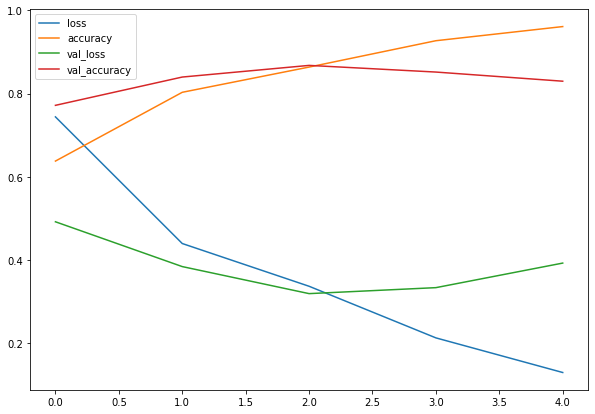

In [45]:
import pandas as pd 
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [46]:
history_4.history

{'accuracy': [0.6380000114440918,
  0.8033333420753479,
  0.8640000224113464,
  0.9273333549499512,
  0.9613333344459534],
 'loss': [0.744243323802948,
  0.4397900104522705,
  0.3370472490787506,
  0.21295149624347687,
  0.12971757352352142],
 'val_accuracy': [0.7720000147819519,
  0.8399999737739563,
  0.8679999709129333,
  0.8519999980926514,
  0.8299999833106995],
 'val_loss': [0.49206024408340454,
  0.38433781266212463,
  0.319339781999588,
  0.3337189853191376,
  0.392758309841156]}

In [47]:
def plot_loss_curves(history):
  loss= history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy= history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label = "trainning loss")
  plt.plot(epochs,val_loss, label ="val_loss")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label = "trainning loss")
  plt.plot(epochs,val_accuracy, label ="val_loss")
  plt.legend()

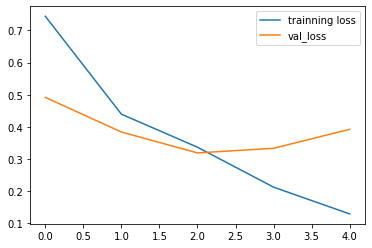

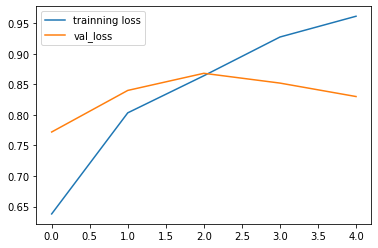

In [48]:
plot_loss_curves(history_4)

In [49]:
model_5 = Sequential(
    [
     Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
     MaxPool2D(pool_size=2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(),
     Conv2D(10,3, activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation="sigmoid")
    ]
)



In [50]:
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_5 = model_5.fit(train_data,
                        epochs =5,
                        steps_per_epoch =len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6315 - accuracy: 0.6493 - val_loss: 0.5059 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4812 - accuracy: 0.7767 - val_loss: 0.4883 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4395 - accuracy: 0.7993 - val_loss: 0.4410 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4221 - accuracy: 0.8107 - val_loss: 0.3698 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3889 - accuracy: 0.8280 - val_loss: 0.3587 - val_accuracy: 0.8400


In [51]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 140ms/step - loss: 0.3928 - accuracy: 0.8300


[0.3927583396434784, 0.8299999833106995]

In [52]:
cnn_model.evaluate(test_data)

16/16 [==============================] - 2s 138ms/step - loss: 0.3129 - accuracy: 0.8680


[0.312892884016037, 0.8679999709129333]

In [53]:
model_5.evaluate(test_data)

16/16 [==============================] - 2s 132ms/step - loss: 0.3587 - accuracy: 0.8400


[0.3587070107460022, 0.8399999737739563]

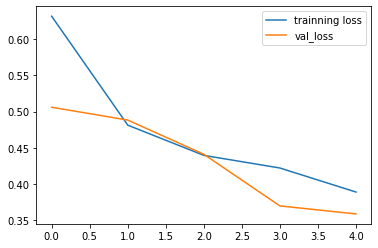

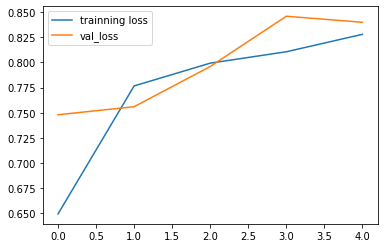

In [54]:
plot_loss_curves(history_5)

In [69]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip = True)

train_datagen= ImageDataGenerator(rescale=1/255.,)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [70]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle = False)

print("Non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size= 32,
                                               class_mode = "binary",
                                               shuffle = False)
print("non augmented test data")

test_data= test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size=32,
                                            class_mode ="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


In [71]:
images,labels  =train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()



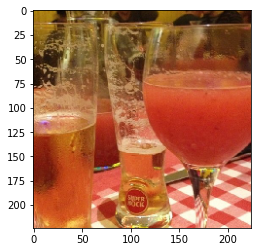

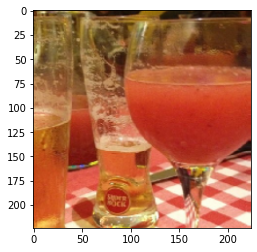

In [73]:
import random
random_number = random.randint(0,32) 
plt.imshow(images[random_number])
plt.figure()
plt.imshow(augmented_images[random_number])

In [74]:
tf.random.set_seed(42)

model_6 =Sequential(
    [
     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
     MaxPool2D(pool_size=2),
     Conv2D(10,3,activation='relu'),
     MaxPool2D(),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation="sigmoid")

    ]
) 

model_6.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics =["accuracy"]
)

history_6 =model_6.fit(train_data_augmented,
                       epochs = 5,
                       steps_per_epoch= len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 470ms/step - loss: 0.7195 - accuracy: 0.4913 - val_loss: 0.6917 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6935 - accuracy: 0.4873 - val_loss: 0.6873 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.6889 - accuracy: 0.5673 - val_loss: 0.6751 - val_accuracy: 0.5860
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.7034 - accuracy: 0.5833 - val_loss: 0.6773 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6687 - accuracy: 0.6460 - val_loss: 0.6161 - val_accuracy: 0.7720


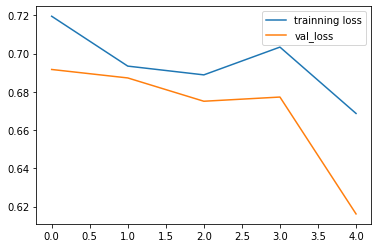

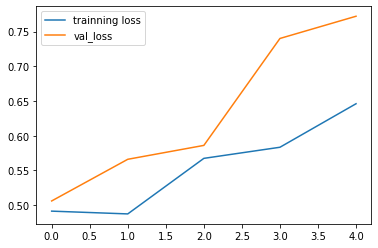

In [75]:
plot_loss_curves(history_6)

In [76]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size =(224,224),
                                                                            class_mode="binary",
                                                                            batch_size =32,
                                                                            shuffle=True)


Found 1500 images belonging to 2 classes.


In [78]:
model_7 = Sequential(
    [
     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
     MaxPool2D(),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation="sigmoid")
    ]
)

model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics = ["accuracy"]
)

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch =len(train_data_augmented_shuffled),
                        validation_data =test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 473ms/step - loss: 0.6472 - accuracy: 0.6220 - val_loss: 0.4814 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5596 - accuracy: 0.7360 - val_loss: 0.4515 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5379 - accuracy: 0.7507 - val_loss: 0.4265 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4937 - accuracy: 0.7687 - val_loss: 0.5998 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5024 - accuracy: 0.7587 - val_loss: 0.3922 - val_accuracy: 0.8420


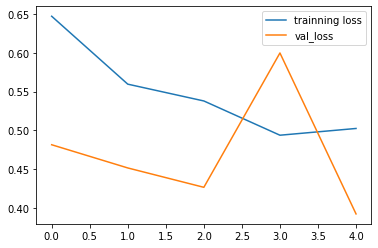

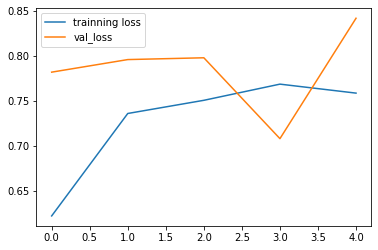

In [79]:
plot_loss_curves(history_7)

In [80]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6760)             

In [81]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [82]:
import matplotlib.image as mpimg

In [90]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

--2021-07-17 07:02:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-07-17 07:02:24 (33.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



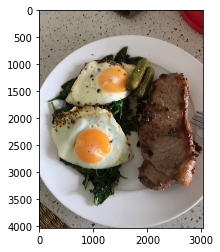

In [91]:
# View Example

steak = mpimg.imread("/content/03-steak.jpeg")
plt.imshow(steak)


In [92]:
steak.shape

(4032, 3024, 3)

In [93]:
def load_and_prep_image(filename,image_shape=224):
  img = tf.io.read_file(filename=filename)
  img = tf.image.decode_image(img,channels=3)
  img= tf.image.resize(img,size =[image_shape,image_shape])

  img = img/255.
  return img

In [94]:
steak = load_and_prep_image("03-steak.jpeg")

In [95]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [96]:
steak = tf.expand_dims(steak,axis =0)

In [97]:
steak.shape

TensorShape([1, 224, 224, 3])

In [98]:
model_7.predict(steak)

array([[0.84104323]], dtype=float32)

In [102]:
def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)


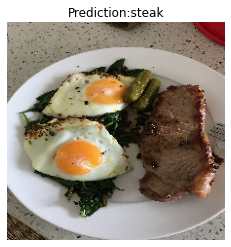

In [103]:
pred_and_plot(model_7,"03-steak.jpeg")

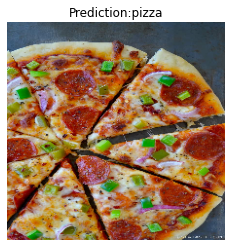

In [104]:
pred_and_plot(model_7,"pizza.jpg")